In [60]:
import pandas as pd
import numpy as np

df = pd.read_csv("segundoclip_transformed3.csv")

In [61]:
df.groupby("CRN")[["Materia","Dias", "Hora"]].apply(lambda x: x.equals(x.shift(1))).value_counts()

False    305
dtype: int64

<Axes: >

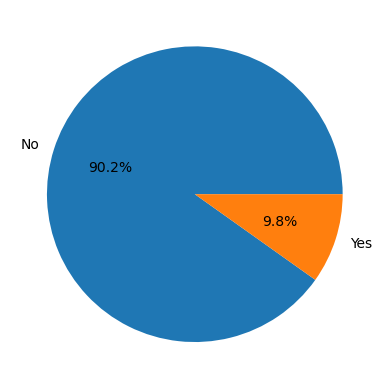

In [62]:
df[["CRN", "Dias", "Hora"]].groupby("CRN").apply(lambda x: x["Hora"].is_unique).value_counts(normalize=True).plot(kind="pie", labels=["No", "Yes"], autopct='%1.1f%%')

In [63]:
df["Hora"]

0      4
1      5
2      3
3      2
4      2
      ..
777    2
778    2
779    3
780    3
781    3
Name: Hora, Length: 782, dtype: int64

In [64]:
df.groupby('Maestro')['Frecuencia'].sum().sort_values(ascending=False)

Maestro
Julia Merino                            45
Flor Sofía Canalizo Montes de Oca       45
Jorge de la Garza                       41
Digby Joseph                            36
Yolanda Chapa González                  36
                                        ..
Blanca Dávalos Rojas                    12
Martha Idalia Morín Zuñiga               9
Maria Adriana Rodríguez                  9
María Rodríguez / Claudia de la Peña     1
María Rodríguez / Cecilia Rodríguez      1
Name: Frecuencia, Length: 82, dtype: int64

In [65]:
df[df['Maestro'] == 'Maria Adriana Rodríguez']

,Bach,CRN,Academia,Materia,Maestro,Semestre,Frecuencia,Salón,Hora,Dias,...,Info_Semana9,Info_Semana10,Info_Semana11,Info_Semana12,Info_Semana13,Info_Semana14,Info_Semana15,Info_Semana16,Info_Semana17,Info_Semana18
558,BBI,11257,ES,Literatura Española IV,Maria Adriana Rodríguez,6,3,7106,4,Lunes,...,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106
559,BBI,11257,ES,Literatura Española IV,Maria Adriana Rodríguez,6,3,7106,4,Viernes,...,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106
560,BBI,11257,ES,Literatura Española IV,Maria Adriana Rodríguez,6,3,7106,1,Miercoles,...,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106,Literatura Española IV\n 7106


In [66]:
libresdf = pd.DataFrame([{"Dias":k, "Hora": v} for k in ["Lunes", "Martes", "Miercoles", "Jueves", "Viernes"] for v in range(1, 6)], columns=df.columns)

In [67]:
maestrosdf = []
for i in df['Maestro'].unique():
    #Agrega todos los horarios para todos los maestros, es necesario considerar su tipo de contrato.
    libresdf['Maestro'] = i
    maestrosdf.append(libresdf)
maestrosdf = pd.concat(maestrosdf)


In [68]:
horarios_conlibres = pd.merge(maestrosdf, df, on=["Maestro", "Dias", "Hora"], how="left")

In [69]:
horarios_conlibres.tail(40)

,Bach_x,CRN_x,Academia_x,Materia_x,Maestro,Semestre_x,Frecuencia_x,Salón_x,Hora,Dias,...,Info_Semana9_y,Info_Semana10_y,Info_Semana11_y,Info_Semana12_y,Info_Semana13_y,Info_Semana14_y,Info_Semana15_y,Info_Semana16_y,Info_Semana17_y,Info_Semana18_y
2010,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,1,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,2,Miercoles,...,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101
2012,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,3,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,4,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,5,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,1,Jueves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,2,Jueves,...,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101
2017,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,3,Jueves,...,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103
2018,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,4,Jueves,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,5,Jueves,...,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103,Pensamiento Creativo\n 18103


In [74]:
titus = pd.read_csv('/Users/diegoguajardogomez/Downloads/LIGAS DE ZOOM-TITULARIDAD-OTOÑO2023.csv').dropna(thresh=5)
titus = titus[['BACH', 'CRN', 'Academia', 'Materia', 'Maestro', 'Semestre', 'Salón', 'Hora']]

In [76]:
titus['Dias'] = titus['Semestre'].apply(lambda x: ['Lunes', 'Martes', 'Jueves', 'Viernes'] if x == 6 else ['Lunes', 'Martes', 'Miércoles','Jueves', 'Viernes'])

In [77]:
titus = titus.explode('Dias').reset_index(drop=True)

In [86]:
pd.set_option('display.max_columns', 500)
pd.merge(horarios_conlibres, titus, on=["Maestro", "Dias", "Hora"], how="left").tail(50)

,Bach_x,CRN_x,Academia_x,Materia_x,Maestro,Semestre_x,Frecuencia_x,Salón_x,Hora,Dias,BLOQUE_x,Semana1_x,Semana2_x,Semana3_x,Semana4_x,Semana5_x,Semana6_x,Semana7_x,Semana8_x,Semana9_x,Semana10_x,Semana11_x,Semana12_x,Semana13_x,Semana14_x,Semana15_x,Semana16_x,Semana17_x,Semana18_x,Info_Semana1_x,Info_Semana2_x,Info_Semana3_x,Info_Semana4_x,Info_Semana5_x,Info_Semana6_x,Info_Semana7_x,Info_Semana8_x,Info_Semana9_x,Info_Semana10_x,Info_Semana11_x,Info_Semana12_x,Info_Semana13_x,Info_Semana14_x,Info_Semana15_x,Info_Semana16_x,Info_Semana17_x,Info_Semana18_x,Bach_y,CRN_y,Academia_y,Materia_y,Semestre_y,Frecuencia_y,Salón_y,BLOQUE_y,Semana1_y,Semana2_y,Semana3_y,Semana4_y,Semana5_y,Semana6_y,Semana7_y,Semana8_y,Semana9_y,Semana10_y,Semana11_y,Semana12_y,Semana13_y,Semana14_y,Semana15_y,Semana16_y,Semana17_y,Semana18_y,Info_Semana1_y,Info_Semana2_y,Info_Semana3_y,Info_Semana4_y,Info_Semana5_y,Info_Semana6_y,Info_Semana7_y,Info_Semana8_y,Info_Semana9_y,Info_Semana10_y,Info_Semana11_y,Info_Semana12_y,Info_Semana13_y,Info_Semana14_y,Info_Semana15_y,Info_Semana16_y,Info_Semana17_y,Info_Semana18_y,BACH,CRN,Academia,Materia,Semestre,Salón
2000,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,1,Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,2,Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BMC,11249,TF,Pensamiento Creativo,4.0,2.0,18101.0,MAKER,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,18101.0,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,Pensamiento Creativo\n 18101,NaN,NaN,NaN,NaN,NaN,NaN
2002,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,3,Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,4,Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,5,Lunes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,1,Martes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
prepa = df.groupby("Maestro")[["Dias", "Hora"]].apply(lambda x: pd.merge(libresdf, x, on=["Dias", "Hora"], how="right"))
prepa.set_index("Maestro", inplace=True)

In [ ]:
pd.merge(libresdf, prepa, on=["Maestro", "Dias", "Hora"], how="right")

,Bach_x,CRN_x,Academia_x,Materia_x,Maestro,Semestre_x,Frecuencia_x,Salón_x,Hora,Dias,...,Info_Semana9_y,Info_Semana10_y,Info_Semana11_y,Info_Semana12_y,Info_Semana13_y,Info_Semana14_y,Info_Semana15_y,Info_Semana16_y,Info_Semana17_y,Info_Semana18_y
0,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,4,Lunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,4,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,4,Viernes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,2,Lunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,2,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,5,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
778,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,5,Viernes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
779,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,3,Lunes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
780,NaN,NaN,NaN,NaN,Daniela Iruegas Gutiérrez,NaN,NaN,NaN,3,Miercoles,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
